# Neural Network

In [135]:
import mlrose
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [136]:

# Load the Iris dataset
data = load_iris()

In [137]:

# Get feature values of first observation
print(data.data[0])

[5.1 3.5 1.4 0.2]


In [138]:

# Get feature names
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [139]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, 
                                                    random_state = 3)

In [142]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

In [144]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(activation='relu', algorithm='random_hill_climb', bias=True,
              clip_max=5, curve=False, early_stopping=True, hidden_nodes=[2],
              is_classifier=True, learning_rate=0.0001, max_attempts=100,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=3,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [145]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.45


In [146]:

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5333333333333333


In [147]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(activation='relu', algorithm='simulated_annealing', bias=True,
              clip_max=5, curve=False, early_stopping=True, hidden_nodes=[2],
              is_classifier=True, learning_rate=0.0001, max_attempts=100,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=3,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [148]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.4583333333333333


In [149]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5333333333333333


In [150]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(activation='relu', algorithm='genetic_alg', bias=True, clip_max=5,
              curve=False, early_stopping=True, hidden_nodes=[2],
              is_classifier=True, learning_rate=0.0001, max_attempts=100,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=3,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [151]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.8916666666666667


In [152]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.9


# Cerdit data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def preprocessing():
    df = pd.read_excel('datasets/credit_card/credit_card.xls')
    print(df.columns[:-1])
    df = df.iloc[1:, :]
    
#     # Drop colume description
#     df =  df.iloc[:, 1:]
#     print(df.head())

#     # Drop ID
#     df = df.iloc[1:, :]

    ## Divide into features and output
    X= df.iloc[:, :-1]
    y= np.array(df.iloc[:, -1])
    
    print (X.head())
    
    print (y)
    ## splitting into training and testing
    size = 10
    X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2)


    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    print('finished preparing the data')

    return X_train,X_test,y_train,y_test, df

X_train,X_test,y_train,y_test, df = preprocessing()

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23'],
      dtype='object')
  Unnamed: 0      X1 X2 X3 X4  X5  X6 X7  X8  X9  ...    X14    X15    X16  \
1          1   20000  2  2  1  24   2  2  -1  -1  ...    689      0      0   
2          2  120000  2  2  2  26  -1  2   0   0  ...   2682   3272   3455   
3          3   90000  2  2  2  34   0  0   0   0  ...  13559  14331  14948   
4          4   50000  2  2  1  37   0  0   0   0  ...  49291  28314  28959   
5          5   50000  1  2  1  57  -1  0  -1   0  ...  35835  20940  19146   

     X17   X18    X19    X20   X21   X22   X23  
1      0     0    689      0     0     0     0  
2   3261     0   1000   1000  1000     0  2000  
3  15549  1518   1500   1000  1000  1000  5000  
4  29547  2000   2019   1200  1100  1069  1000  
5  19131  2000  36681  10000  9000   689   679  

[5 rows x 24 columns]
[1 1

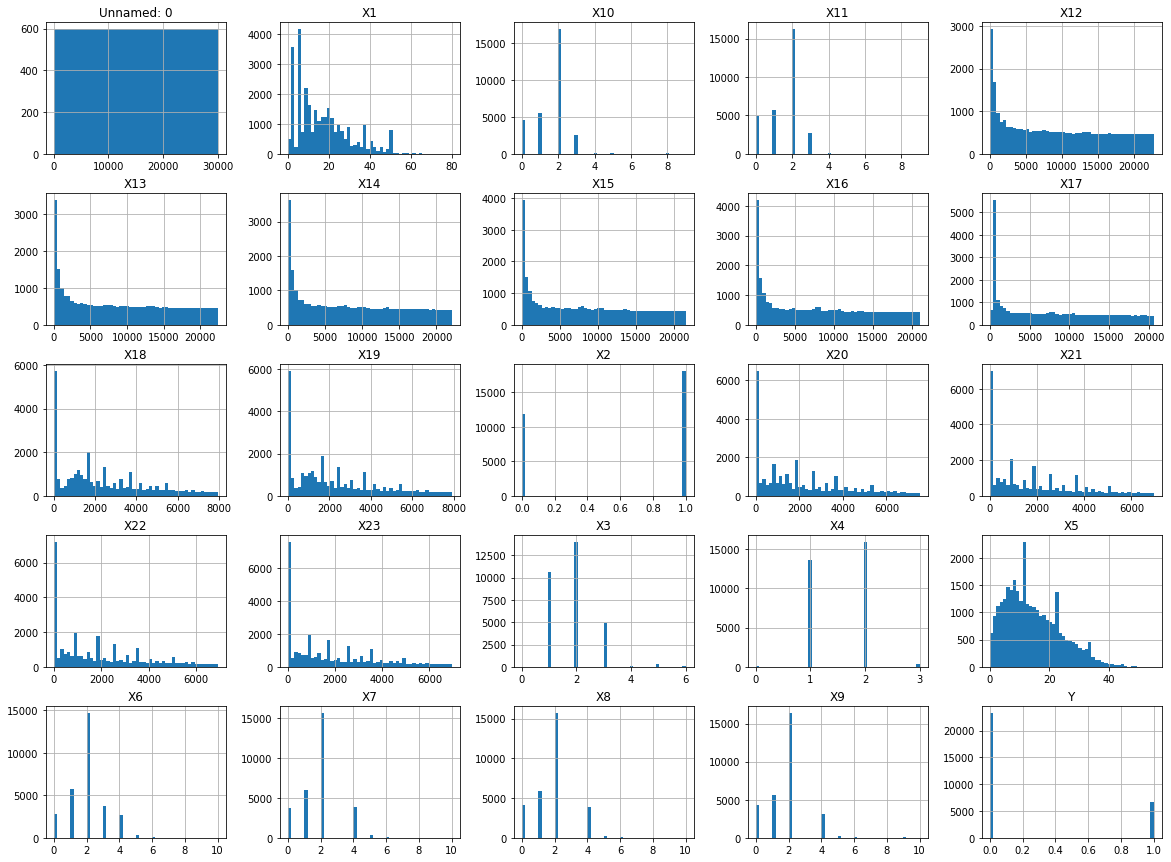

In [4]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)

%matplotlib inline
import matplotlib.pyplot as plt
df = df.apply(lambda x: d[x.name].fit_transform(x))
df.hist(bins=50, figsize=(20,15))
plt.savefig("credit_attibutes_dist", dpi=300)

In [5]:
# Verify that the split preserves the distrubution  
y = df['Y'].copy()
X = df.drop("Y", axis=1).copy()
X.describe()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())



---------------------------
count    24000.000000
mean         0.221792
std          0.415460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Y, dtype: float64
---------------------------
count    6000.000000
mean        0.218833
std         0.413490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Y, dtype: float64


In [10]:
y_train

21754    0
252      0
22942    0
619      0
17091    0
        ..
29803    0
5391     1
861      0
15796    1
23655    1
Name: Y, Length: 24000, dtype: int64

In [9]:
from sklearn import preprocessing

std_scale_x_train = preprocessing.StandardScaler().fit(X_train)
x_train_norm = std_scale_x_train.transform(X_train)

std_scale_x_test = preprocessing.StandardScaler().fit(X_test)
X_test_norm = std_scale_x_test.transform(X_test)
x_train_norm

array([[ 0.7768437 , -0.66718184,  0.80815856, ..., -0.4135099 ,
        -0.30959505, -0.57528951],
       [-1.70028095, -1.04463076, -1.23738094, ..., -0.54735632,
        -1.03157356, -1.00971662],
       [ 0.9137065 ,  0.08771598,  0.80815856, ...,  1.29289858,
         1.71591109, -0.92528921],
       ...,
       [-1.63012149, -0.89365119, -1.23738094, ..., -1.02835021,
        -1.03157356, -1.00971662],
       [ 0.09045598, -0.74267163,  0.80815856, ..., -0.4225752 ,
        -1.03157356, -0.41177821],
       [ 0.99584723, -0.06326358,  0.80815856, ..., -0.21087389,
         1.95013872, -0.27124398]])

In [11]:
import mlrose
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(x_train_norm, y_train)

NeuralNetwork(activation='relu', algorithm='random_hill_climb', bias=True,
              clip_max=5, curve=False, early_stopping=True, hidden_nodes=[2],
              is_classifier=True, learning_rate=0.0001, max_attempts=100,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=3,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [12]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(x_train_norm)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)

0.7782083333333333


In [15]:

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_norm)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.7811666666666667


In [16]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(x_train_norm, y_train)

NeuralNetwork(activation='relu', algorithm='simulated_annealing', bias=True,
              clip_max=5, curve=False, early_stopping=True, hidden_nodes=[2],
              is_classifier=True, learning_rate=0.0001, max_attempts=100,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=3,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [17]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(x_train_norm)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)

0.7782083333333333


In [18]:

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_norm)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.7811666666666667


In [23]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [100], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(x_train_norm, y_train)

NeuralNetwork(activation='relu', algorithm='genetic_alg', bias=True, clip_max=5,
              curve=False, early_stopping=True, hidden_nodes=[100],
              is_classifier=True, learning_rate=0.0001, max_attempts=100,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=3,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [24]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(x_train_norm)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)

0.8006666666666666


In [25]:

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_norm)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.7986666666666666
